<a href="https://colab.research.google.com/github/mili-b/mili-b/blob/main/Data201_PythonProject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:


# data source - https://www.sciencedirect.com/science/article/pii/S2532340918308242#t0010
# Data - look at a set of 13 corporate governance indicators for 626 firms across six Asian
# countries (China, India, Indonesia, Japan, South Korea, Thailand) from 2010-2017 
# (for total 5008 year-observations - 626x8) and combine them to form a coporate governance index
# Also provide six financial performance indicators
# Goal - to see whether corporate governance factors influence financial performance

# The project ananlysis found little evidence to support this hypothesis for these firms
# in these countries over this time period, using the financials, goverance factors and index as developed
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/mili-b/mili-b/main/CorpGovData.csv')
df


,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
0,600000 CH,600000 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,14.60,0.00,0.13,0.18,0.00,NaN
1,600008 CH,600008 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,9.73,-0.05,0.12,0.31,0.28,0.0
2,600009 CH,600009 CH Equity,China,2010,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,9.77,-0.03,0.08,0.14,0.77,0.0
3,600010 CH,600010 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,10.65,-0.05,0.05,0.39,0.49,0.0
4,600015 CH,600015 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,13.85,0.00,0.14,0.21,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,UNIQ TB,UNIQ TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.22,-0.02,0.01,0.29,0.20,0.0
5004,UV TB,UV TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.64,-0.01,0.04,0.46,0.31,0.0
5005,WHA TB,WHA TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.21,-0.02,0.03,0.47,0.19,0.0
5006,WHAUP TB,WHAUP TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.97,-0.02,0.03,0.18,0.14,0.0


In [60]:

df.shape


(5008, 24)

# Data Types 

In [61]:

df.dtypes


Ticker_Id                                             object
Indx_Members                                          object
Country                                               object
Year                                                   int64
Board size                                           float64
Board independence                                   float64
CEO duality                                          float64
Board meeting attendance                             float64
Independence of audit committee                      float64
Auditor ratification                                 float64
Independence of compensation committee               float64
Independence of nomination committee                 float64
Shareholder approved poison pill                     float64
Dual class unequal voting rights of common shares    float64
Staggered board                                      float64
Diversity of board                                   float64
Board duration          

# Missing Values

In [62]:

df.isna().sum()


Ticker_Id                                               0
Indx_Members                                            0
Country                                                 0
Year                                                    0
Board size                                            144
Board independence                                    144
CEO duality                                           144
Board meeting attendance                              144
Independence of audit committee                       144
Auditor ratification                                  144
Independence of compensation committee                144
Independence of nomination committee                  144
Shareholder approved poison pill                      144
Dual class unequal voting rights of common shares     144
Staggered board                                       144
Diversity of board                                    144
Board duration                                        144
Corporate gove

## Drop rows with missing corporate governance values

In [63]:

df1 = df.dropna(subset=['Corporate governance score'])

In [64]:

df1.isna().sum()

Ticker_Id                                               0
Indx_Members                                            0
Country                                                 0
Year                                                    0
Board size                                              0
Board independence                                      0
CEO duality                                             0
Board meeting attendance                                0
Independence of audit committee                         0
Auditor ratification                                    0
Independence of compensation committee                  0
Independence of nomination committee                    0
Shareholder approved poison pill                        0
Dual class unequal voting rights of common shares       0
Staggered board                                         0
Diversity of board                                      0
Board duration                                          0
Corporate gove

In [65]:

df1.shape

(4864, 24)

## Fill remaining missing values with column means

In [66]:

df2 = df1.fillna(df1.mean())
df2


,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
0,600000 CH,600000 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,14.60,0.00,0.13,0.18,0.00,0.012268
1,600008 CH,600008 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,9.73,-0.05,0.12,0.31,0.28,0.000000
2,600009 CH,600009 CH Equity,China,2010,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,9.77,-0.03,0.08,0.14,0.77,0.000000
3,600010 CH,600010 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,10.65,-0.05,0.05,0.39,0.49,0.000000
4,600015 CH,600015 CH Equity,China,2010,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,13.85,0.00,0.14,0.21,0.01,0.012268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,UNIQ TB,UNIQ TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.22,-0.02,0.01,0.29,0.20,0.000000
5004,UV TB,UV TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.64,-0.01,0.04,0.46,0.31,0.000000
5005,WHA TB,WHA TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.21,-0.02,0.03,0.47,0.19,0.000000
5006,WHAUP TB,WHAUP TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.97,-0.02,0.03,0.18,0.14,0.000000


In [67]:
df2.isnull().sum()

Ticker_Id                                            0
Indx_Members                                         0
Country                                              0
Year                                                 0
Board size                                           0
Board independence                                   0
CEO duality                                          0
Board meeting attendance                             0
Independence of audit committee                      0
Auditor ratification                                 0
Independence of compensation committee               0
Independence of nomination committee                 0
Shareholder approved poison pill                     0
Dual class unequal voting rights of common shares    0
Staggered board                                      0
Diversity of board                                   0
Board duration                                       0
Corporate governance score                           0
LogAsset  

# Histograms

corporate governance vairables are coded as binary - 0, 1;
finanical variables are continuous

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1997bc3d0>,
      dtype=object)

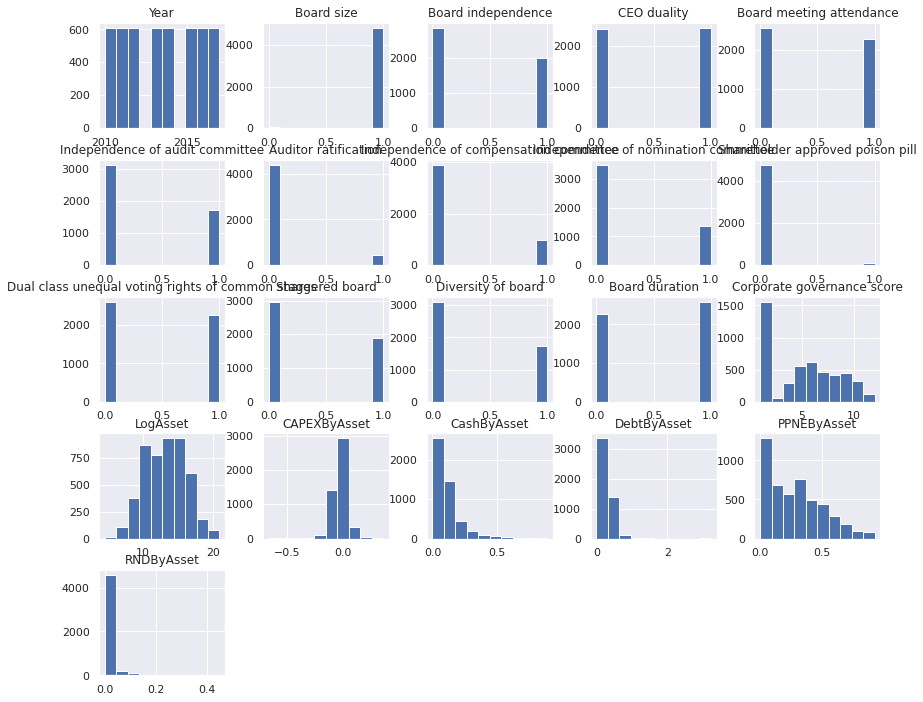

In [68]:
# Board Size: size<=5 is 1, 0 otherwise; most boards (over 4000 of 4864) have fewer than 5 members
# board independence: >50% indep =1, 0 otherwise; majority less than 50% independent
# ceo duality (combined chair/ceo): not combined = 1, 0 otherwise; about half have combined chair/ceo
# Board meeting attendance: attend >=2/3 =1; 0 otherwise. little more than half not attend >2/3 meetings
# Indep audit committee: >50% indep = 1; 0 otherwise. majority not have audit comm > 50% indep
# auditor ratification: shareholders allowed to ratify auditors = 1; 0 otherwise. overwhelming majority not allow ratif.
# independence Compensation committee: >3 indep member = 1, 0 otherwise. Overwhelming majority not have >3 indep comp comm members
# independence nominating committee: >50% indep = 1, 0 otherwise. most not have >50% indep comm members
# allow shareholder approval of poison pill: yes = 1, 0 otherwise. almost no firms allow shareholder vote on pill
# dual class unequal voting rights: no, not have = 1, 0 otherwise. almost half of firms not have it in place 
# staggered/classified board: not have = 1, 0 otherwise. most have classified boards
# board diversity: >=1 women on board = 1, 0 otherwise.  most have no women on board
# board duration: on  the board < 9 years = 1, 0 otherwise. almost half on board < 9 years


df2.hist(figsize=(14,12))


# Correlations

### correlations not strong for corporate governance scores with financial vairables.  





In [69]:

df2.corr()


,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
Year,1.000000,0.014527,0.162619,0.008793,0.030915,0.041455,0.117670,0.064225,0.227770,-0.024436,0.065050,0.029258,0.120992,0.024817,0.122168,0.080109,0.060709,-0.055437,0.009665,-0.025065,-0.002719
Board size,0.014527,1.000000,-0.067132,-0.066252,-0.011865,0.062625,0.031156,0.042855,0.045747,-0.034874,-0.086802,-0.024122,-0.003706,-0.030292,0.007295,-0.082402,0.025608,-0.000460,0.031421,-0.028007,0.040992
Board independence,0.162619,-0.067132,1.000000,0.463574,0.634512,0.662629,0.319694,0.388639,0.504477,-0.061666,0.437466,-0.015468,0.390931,0.374171,0.739149,0.088426,-0.090800,-0.068115,-0.025980,-0.041891,-0.037912
CEO duality,0.008793,-0.066252,0.463574,1.000000,0.602281,0.361175,0.200272,0.245337,0.291788,0.037900,0.296690,0.423222,0.457726,0.424204,0.699281,-0.003560,-0.215869,0.049540,0.025412,-0.026454,-0.050628
Board meeting attendance,0.030915,-0.011865,0.634512,0.602281,1.000000,0.552043,0.321233,0.357773,0.361271,-0.101436,0.191191,0.227156,0.482259,0.338759,0.728209,-0.193078,-0.256713,0.092364,0.007769,-0.043547,-0.116225
Independence of audit committee,0.041455,0.062625,0.662629,0.361175,0.552043,1.000000,0.386553,0.576762,0.718749,-0.043437,0.467554,-0.128083,0.356008,0.398836,0.758888,0.050158,-0.087886,-0.095224,0.005744,-0.034477,-0.049242
Auditor ratification,0.117670,0.031156,0.319694,0.200272,0.321233,0.386553,1.000000,0.263676,0.353504,-0.044017,0.142381,-0.000493,0.223600,0.137029,0.431329,-0.013914,-0.107941,-0.053670,-0.003863,0.036448,-0.057795
Independence of compensation committee,0.064225,0.042855,0.388639,0.245337,0.357773,0.576762,0.263676,1.000000,0.579790,0.008643,0.299962,0.025632,0.328578,0.295444,0.608276,0.078742,-0.052135,-0.049662,-0.019578,-0.144328,-0.018345
Independence of nomination committee,0.227770,0.045747,0.504477,0.291788,0.361271,0.718749,0.353504,0.579790,1.000000,-0.006259,0.405810,-0.016361,0.349975,0.377986,0.694021,0.171565,0.029633,-0.105794,0.004462,-0.098011,0.022391
Shareholder approved poison pill,-0.024436,-0.034874,-0.061666,0.037900,-0.101436,-0.043437,-0.044017,0.008643,-0.006259,1.000000,0.143895,0.158377,-0.028723,0.127924,0.072181,0.071969,-0.036781,-0.046172,0.017925,0.062404,0.076539


# Distribution of corporate governance scores

### large number (over 1500) appear to have strong governance - as coded (cg = 1)

In [70]:

df2.groupby(['Corporate governance score'])['Ticker_Id'].count()


Corporate governance score
1.0     1549
2.0       11
3.0       55
4.0      296
5.0      552
6.0      622
7.0      466
8.0      417
9.0      452
10.0     324
11.0     109
12.0      11
Name: Ticker_Id, dtype: int64

Text(0, 0.5, 'Number of Observations')

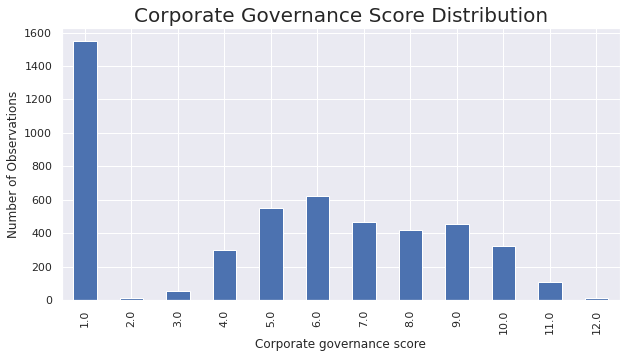

In [155]:

df2.groupby(['Corporate governance score'])['Ticker_Id'].count().plot(kind="bar")
plt.title("Corporate Governance Score Distribution", fontsize=20)
plt.ylabel('Number of Observations')


### Corporate governance has trended up (strengthened) over time - though it fell significantly in 2017

Text(0, 0.5, 'Mean Governance Score')

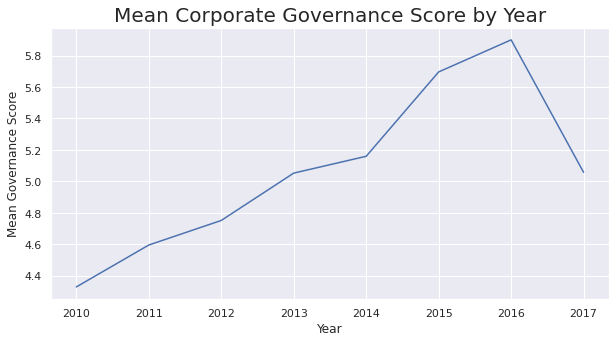

In [158]:

df2.groupby('Year')['Corporate governance score'].mean()
df2.groupby('Year')['Corporate governance score'].mean().plot()
plt.title("Mean Corporate Governance Score by Year", fontsize=20)
plt.ylabel('Mean Governance Score')

# Create strong and weak corporate governance subgroups 
stronggov: CG score = 1; 
  weakgov: CG score >= 8

In [72]:
# Define Strong governance = corporate governance score = 1 (1549 data points)
#lower corp gov score, stronger its corp gov framework

stronggov = df2.nsmallest(1549, 'Corporate governance score')
stronggov

,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
9,600023 CH,600023 CH Equity,China,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.27,-0.08,0.09,0.42,0.62,0.000000
32,600155 CH,600155 CH Equity,China,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.74,-0.06,0.09,3.23,0.71,0.000000
42,600297 CH,600297 CH Equity,China,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.45,-0.07,0.17,0.39,0.33,0.012268
54,600466 CH,600466 CH Equity,China,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.36,-0.03,0.12,0.01,0.46,0.010000
55,600482 CH,600482 CH Equity,China,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.01,-0.03,0.10,0.38,0.36,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,UNIQ TB,UNIQ TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.22,-0.02,0.01,0.29,0.20,0.000000
5004,UV TB,UV TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.64,-0.01,0.04,0.46,0.31,0.000000
5005,WHA TB,WHA TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.21,-0.02,0.03,0.47,0.19,0.000000
5006,WHAUP TB,WHAUP TB Equity,Thailand,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.97,-0.02,0.03,0.18,0.14,0.000000


In [73]:

# Define weak governance = corporate governance score >= 8 (1313 data points)

weakgov = df2.nlargest(1313, 'Corporate governance score')
weakgov

,Ticker_Id,Indx_Members,Country,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
757,601336 CH,601336 CH Equity,China,2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,12.0,12.87,0.00,0.05,0.10,0.01,0.012268
1595,4523 JT,4523 JT Equity,Japan,2012,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,13.82,-0.01,0.10,0.35,0.14,0.120000
2221,4523 JT,4523 JT Equity,Japan,2013,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,13.81,-0.01,0.09,0.32,0.14,0.120000
2669,601939 CH,601939 CH Equity,China,2014,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,12.0,16.63,0.00,0.16,0.10,0.01,0.012268
2847,4523 JT,4523 JT Equity,Japan,2014,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,13.79,-0.01,0.16,0.26,0.14,0.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,029780 KS,029780 KS Equity,South Korea,2017,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.0,16.95,0.04,0.04,0.56,0.03,0.012268
4873,032830 KS,032830 KS Equity,South Korea,2017,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,8.0,19.46,0.01,0.01,0.05,0.00,0.012268
4880,035720 KS,035720 KS Equity,South Korea,2017,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,8.0,15.66,0.18,0.18,0.13,0.04,0.040000
4899,096770 KS,096770 KS Equity,South Korea,2017,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,8.0,17.35,0.06,0.06,0.16,0.40,0.010000


# Compare country distributions for three groups - all, stronggov and weakgov

## firms in South Korea and Thailand appear to have the strongest governance framework, Indian firms have the weakest governace framework followed by Chinese firms

### China accounts for most of the overall distribution, followed by India, Japan, South Korea, Thailand

### South Korea and Thailand companies account for most of the strong governace group, India and Japan the least

### India and China account for most of the weak governance group, South Korea and Thailand the least

In [74]:
# all data - country distribution - China has most observations and highest percent of total
All_country = df2.groupby(['Country'])['Ticker_Id'].count()
All_country

Country
China          1296
India           808
Indonesia       360
Japan           800
South Korea     800
Thailand        800
Name: Ticker_Id, dtype: int64

Text(0, 0.5, ' Portion of Observations')

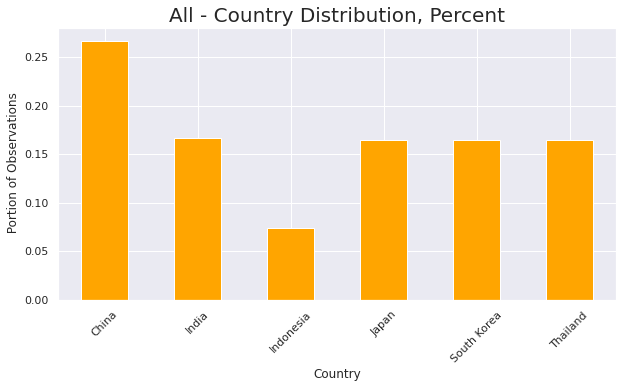

In [134]:

All_countrypercent = All_country/4864
All_countrypercent.plot(kind="bar", color="orange", rot=45)
plt.title("All - Country Distribution, Percent", fontsize=20)
plt.ylabel(" Portion of Observations")


In [76]:
df2.groupby(['Year'])['Ticker_Id'].count()

Year
2010    608
2011    608
2012    608
2013    608
2014    608
2015    608
2016    608
2017    608
Name: Ticker_Id, dtype: int64

In [77]:
# South Korea and Thailand dominate the strong goverance group
stronggov_country = stronggov.groupby('Country')['Ticker_Id'].count()
stronggov_country

Country
China          250
India           81
Indonesia      116
Japan            9
South Korea    565
Thailand       528
Name: Ticker_Id, dtype: int64

Text(0, 0.5, ' Portion of Observations')

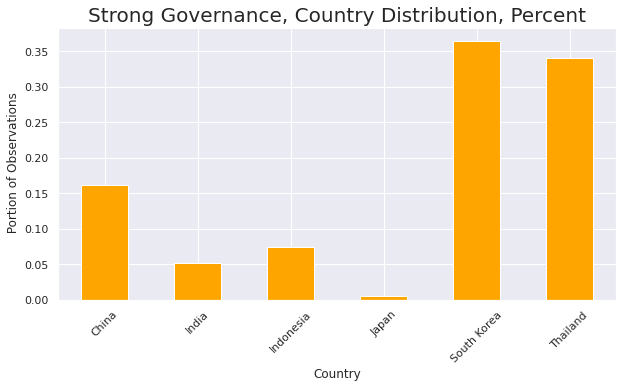

In [135]:

stronggovpercent = stronggov_country/1549
stronggovpercent.plot(kind="bar", color="orange", rot=45)
plt.title("Strong Governance, Country Distribution, Percent", fontsize=20)
plt.ylabel(" Portion of Observations")

In [79]:
# India, followed by China, have the most companies in the weak governace group
weakgov_country = weakgov.groupby('Country')['Ticker_Id'].count()
weakgov_country


Country
China          319
India          519
Indonesia       36
Japan          146
South Korea     89
Thailand       204
Name: Ticker_Id, dtype: int64

Text(0, 0.5, ' Portion of Observations')

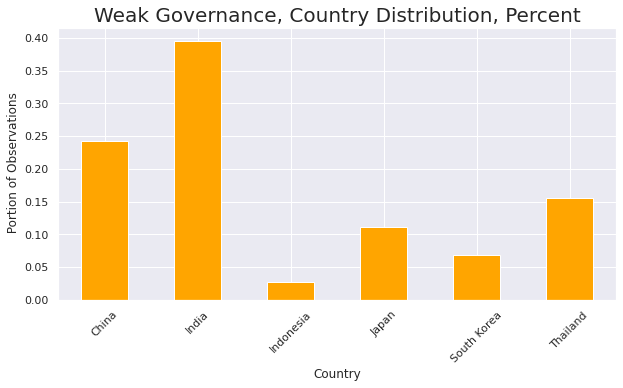

In [136]:

weakgovpercent = weakgov_country/1313
weakgovpercent.plot(kind="bar", color="orange", rot=45)
plt.title("Weak Governance, Country Distribution, Percent", fontsize=20)
plt.ylabel(" Portion of Observations")

# Compare Descriptive Statistics for 3 groups - All, stronggov and weakgov

### This Dataset does NOT provide strong support for the hypothesis that corporate governace matters to financial performance for these 6 Asian economies during the period 2010-2017. If governace mattered, one would expect the mean/median of financial indicators to be highest (lower for DebyByAsset) for firms in the strong governance group, and lowest for firms in the weak governace group. The dataset does not support this 

In [83]:
# EXTRACTED FROM THE DESCRIPTIVE STATS:
# No evidence the means, medians are better for strong governance group for the financial metrics

#LogAsset (rate of return on asset) - expect to be highest for stronggov
# LogAsset_All:       mean=13.17 median=13.3
# LogAsset_stronggov: mean=12.69 median=12.35
# LogAsset_weakgov:   mean=13.46 median=13.13

#CAPEXByAsset (ratio capital expenditure to asset) - expect absolute value to be highest for stronggov
# CAPEXByAsset:           mean=-0.28 median=-0.02
# CAPEXByAsset_stronggov: mean=-0.003 median=0
# CAPEXByAsset_weakgov:   mean=-0.04 median=-0.03

#CashByAsset - expect to be highest for stronggov
# CashByAsset_All:       mean=0.11 median=0.08
# CashByAsset_stronggov: mean=0.09 median=0.06
# CashByAsset_weakgov:   mean=0.09 median=0.06

#DebtByAsset (financial leverage) - expect to be lowest for stronggov
# DebtByAsset_All:       mean=0.25 median=0.23
# DebtByAsset_stronggov: mean=0.26 median=0.25
# DebtByAsset_weakgov:   mean=0.24 median=0.18

#PPNEByAsset (ratio propert, plant & equipment to asset) - expect to be highest for stronggov
# PPNEByAsset_All:       mean=0.28 median=0.25
# PPNEByAsset_stronggov: mean=0.3 median=0.28
# PPNEByAsset_weakgov:   mean=0.25 median=0.18

#RNDByAsset (ratio research & development to asset) - expect to be highest for stronggov
# RNDByAsset_All:       mean=0.01 median=0
# RNDByAsset_stronggov: mean=0.01 median=0
# RNDByAsset_weakgov:   mean=0.01 median=0


In [84]:
# descriptive stats - all
df2.describe()


,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
count,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000,4864.000000
mean,2013.500000,0.990748,0.413446,0.501645,0.472039,0.354441,0.094161,0.199424,0.278988,0.018298,0.463199,0.389391,0.359375,0.532484,5.067640,13.168381,-0.028177,0.109271,0.247886,0.279263,0.012268
std,2.291523,0.095749,0.492502,0.500049,0.499269,0.478393,0.292083,0.399609,0.448548,0.134039,0.498695,0.487662,0.479867,0.498995,3.251433,2.894869,0.063911,0.106495,0.185560,0.222621,0.025018
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.680000,-0.660000,0.000000,0.000000,0.000000,0.000000
25%,2011.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.910000,-0.060000,0.040000,0.100000,0.087500,0.000000
50%,2013.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,13.168381,-0.028177,0.080000,0.240000,0.260000,0.010000
75%,2015.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,8.000000,15.330000,0.000000,0.140000,0.360000,0.430000,0.012268
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,20.840000,0.360000,0.890000,3.230000,0.920000,0.450000


In [85]:
# descriptive stats - strong governace grooup
stronggov.describe()


,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
count,1549.000000,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.0,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,2013.362815,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.747030,-0.005989,0.094343,0.263178,0.293219,0.011015
std,2.382931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.209595,0.076652,0.094250,0.197468,0.213177,0.029677
min,2010.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.680000,-0.660000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.140000,-0.030000,0.030000,0.120000,0.100000,0.000000
50%,2013.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.168381,-0.010000,0.070000,0.247886,0.279263,0.010000
75%,2015.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.520000,0.030000,0.110000,0.380000,0.440000,0.012268
max,2017.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.840000,0.360000,0.890000,3.230000,0.890000,0.450000


In [86]:

# descriptive stats weak governance group
weakgov.describe()

,Year,Board size,Board independence,CEO duality,Board meeting attendance,Independence of audit committee,Auditor ratification,Independence of compensation committee,Independence of nomination committee,Shareholder approved poison pill,Dual class unequal voting rights of common shares,Staggered board,Diversity of board,Board duration,Corporate governance score,LogAsset,CAPEXByAsset,CashByAsset,DebtByAsset,PPNEByAsset,RNDByAsset
count,1313.000000,1313.0,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,2013.958873,1.0,0.883473,0.843107,0.887281,0.939071,0.321401,0.641280,0.820259,0.016756,0.785225,0.372430,0.747144,0.862909,9.120335,13.457792,-0.039011,0.092449,0.246286,0.251444,0.010437
std,2.203064,0.0,0.320978,0.363838,0.316369,0.239291,0.467192,0.479808,0.384118,0.128403,0.410823,0.483636,0.434815,0.344074,0.978810,2.443823,0.053639,0.094197,0.183724,0.236286,0.018437
min,2010.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.710000,-0.450000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,11.580000,-0.060000,0.030000,0.100000,0.010000,0.000000
50%,2014.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,9.000000,13.140000,-0.030000,0.060000,0.220000,0.190000,0.010000
75%,2016.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,10.000000,14.860000,0.000000,0.130000,0.360000,0.430000,0.012268
max,2017.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,20.760000,0.180000,0.650000,0.910000,0.890000,0.160000


# Compare mean LogAsset (rate of return on asset) across countries. The country means for weak governance group (green) are highest, while the country means for strong governance group (orange) are lowest - again - NOT supporting the hypothesis that governace matters to financial performance

### South Korea, which dominate the strong governance group, has the highest means in the three groups (all, stronggov, weakgov) - (weak support that governace may matter?). - But... Thailand, which is also well-represented in the strong governance group, has the lowest returns in the three groups (all, strongggov, weakgov).  India, which has the worst governance practices, has low returns in the three groups (weak support that governace may matter?)

In [104]:

LogAsset_country_all = df2.groupby('Country')['LogAsset'].mean().round(2)
LogAsset_country_all

Country
China          11.20
India          12.62
Indonesia      15.29
Japan          15.11
South Korea    16.19
Thailand       11.00
Name: LogAsset, dtype: float64

In [106]:
LogAsset_country_stronggov = stronggov.groupby('Country')['LogAsset'].mean().round(2)
LogAsset_country_stronggov

Country
China          10.55
India          12.37
Indonesia      13.25
Japan          13.92
South Korea    15.79
Thailand       10.46
Name: LogAsset, dtype: float64

In [112]:

LogAsset_country_weakgov = weakgov.groupby('Country')['LogAsset'].mean().round(2)
LogAsset_country_weakgov

Country
China          12.93
India          12.59
Indonesia      16.42
Japan          15.83
South Korea    18.09
Thailand       12.24
Name: LogAsset, dtype: float64

Text(0, 0.5, 'Mean of LogAsset')

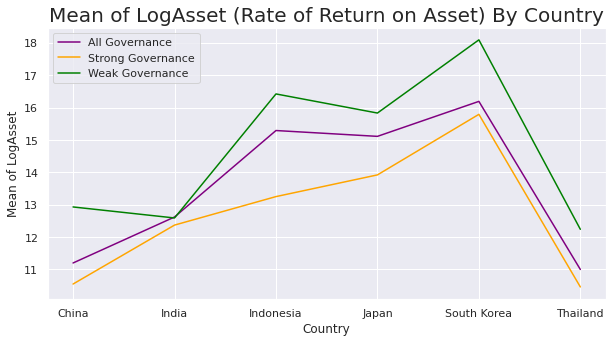

In [138]:
LogAsset_country_all.plot(color="purple", label='All Governance'), LogAsset_country_stronggov.plot(color="orange", label='Strong Governance'), LogAsset_country_weakgov.plot(color="green", label='Weak Governance')
plt.legend()
plt.title("Mean of LogAsset (Rate of Return on Asset) By Country", fontsize=20)
plt.ylabel("Mean of LogAsset")


# Scatter plots - governace score vs financial variables - again - little support that governace matters

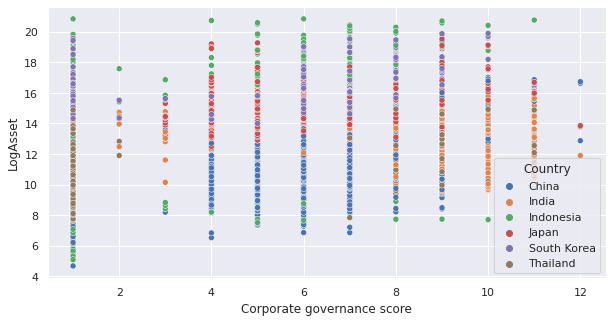

In [157]:
# Not see declining returns for higher/weaker governace scores
# Consistent with previous findings,
# Korean and Thai firms dominate group CG =1 scores; India dominate the weaker scores

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
sns.scatterplot(data=df2, x='Corporate governance score', y='LogAsset', hue='Country')


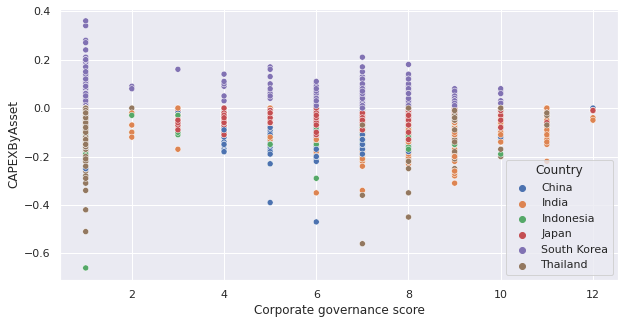

In [88]:
# Not see overall declining  CAPEXByAsset for higher/weaker governace scores
# Korean firams appear to top capex spending in each group

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
sns.scatterplot(data=df2, x='Corporate governance score', y='CAPEXByAsset', hue='Country')


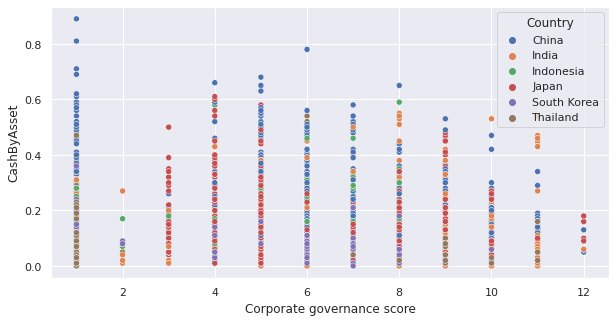

In [89]:
# Chinese firms in group 1 (and most groups) appear to have the most cash by asset

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
sns.scatterplot(data=df2, x='Corporate governance score', y='CashByAsset', hue='Country')


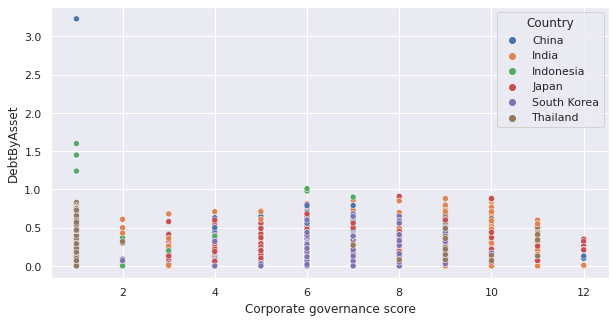

In [90]:
# Indonesian firms seem to be more highly leveraged

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=6
sns.scatterplot(data=df2, x='Corporate governance score', y='DebtByAsset', hue='Country')


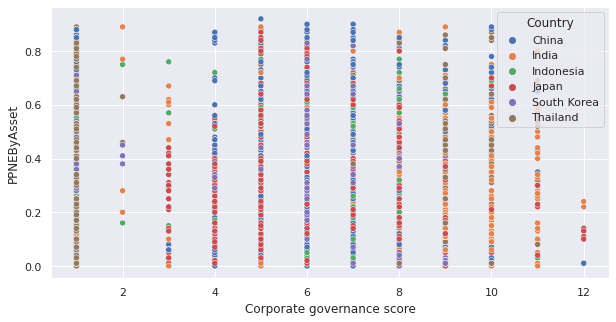

In [91]:

sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=5
sns.scatterplot(data=df2, x='Corporate governance score', y='PPNEByAsset', hue='Country')


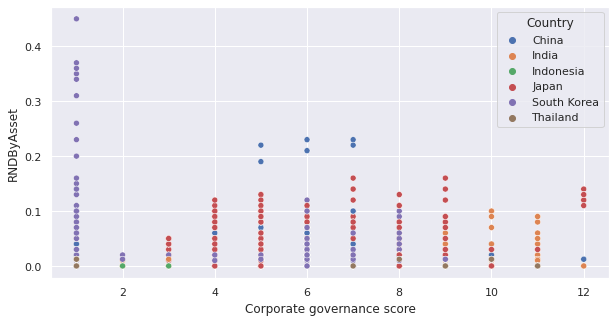

In [92]:
# Korean firms in group 1 dominate R&D spending. Indian firms in group 11 dominate R&D
# Korean, Japanese and Indian firms are well-represented in R&D spending. some strong Chinese firms present too
sns.set(rc={"figure.figsize":(10, 5)}) #width=10, height=6
sns.scatterplot(data=df2, x='Corporate governance score', y='RNDByAsset', hue='Country')
